# Support Vector Machines 
## Exercise

# [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

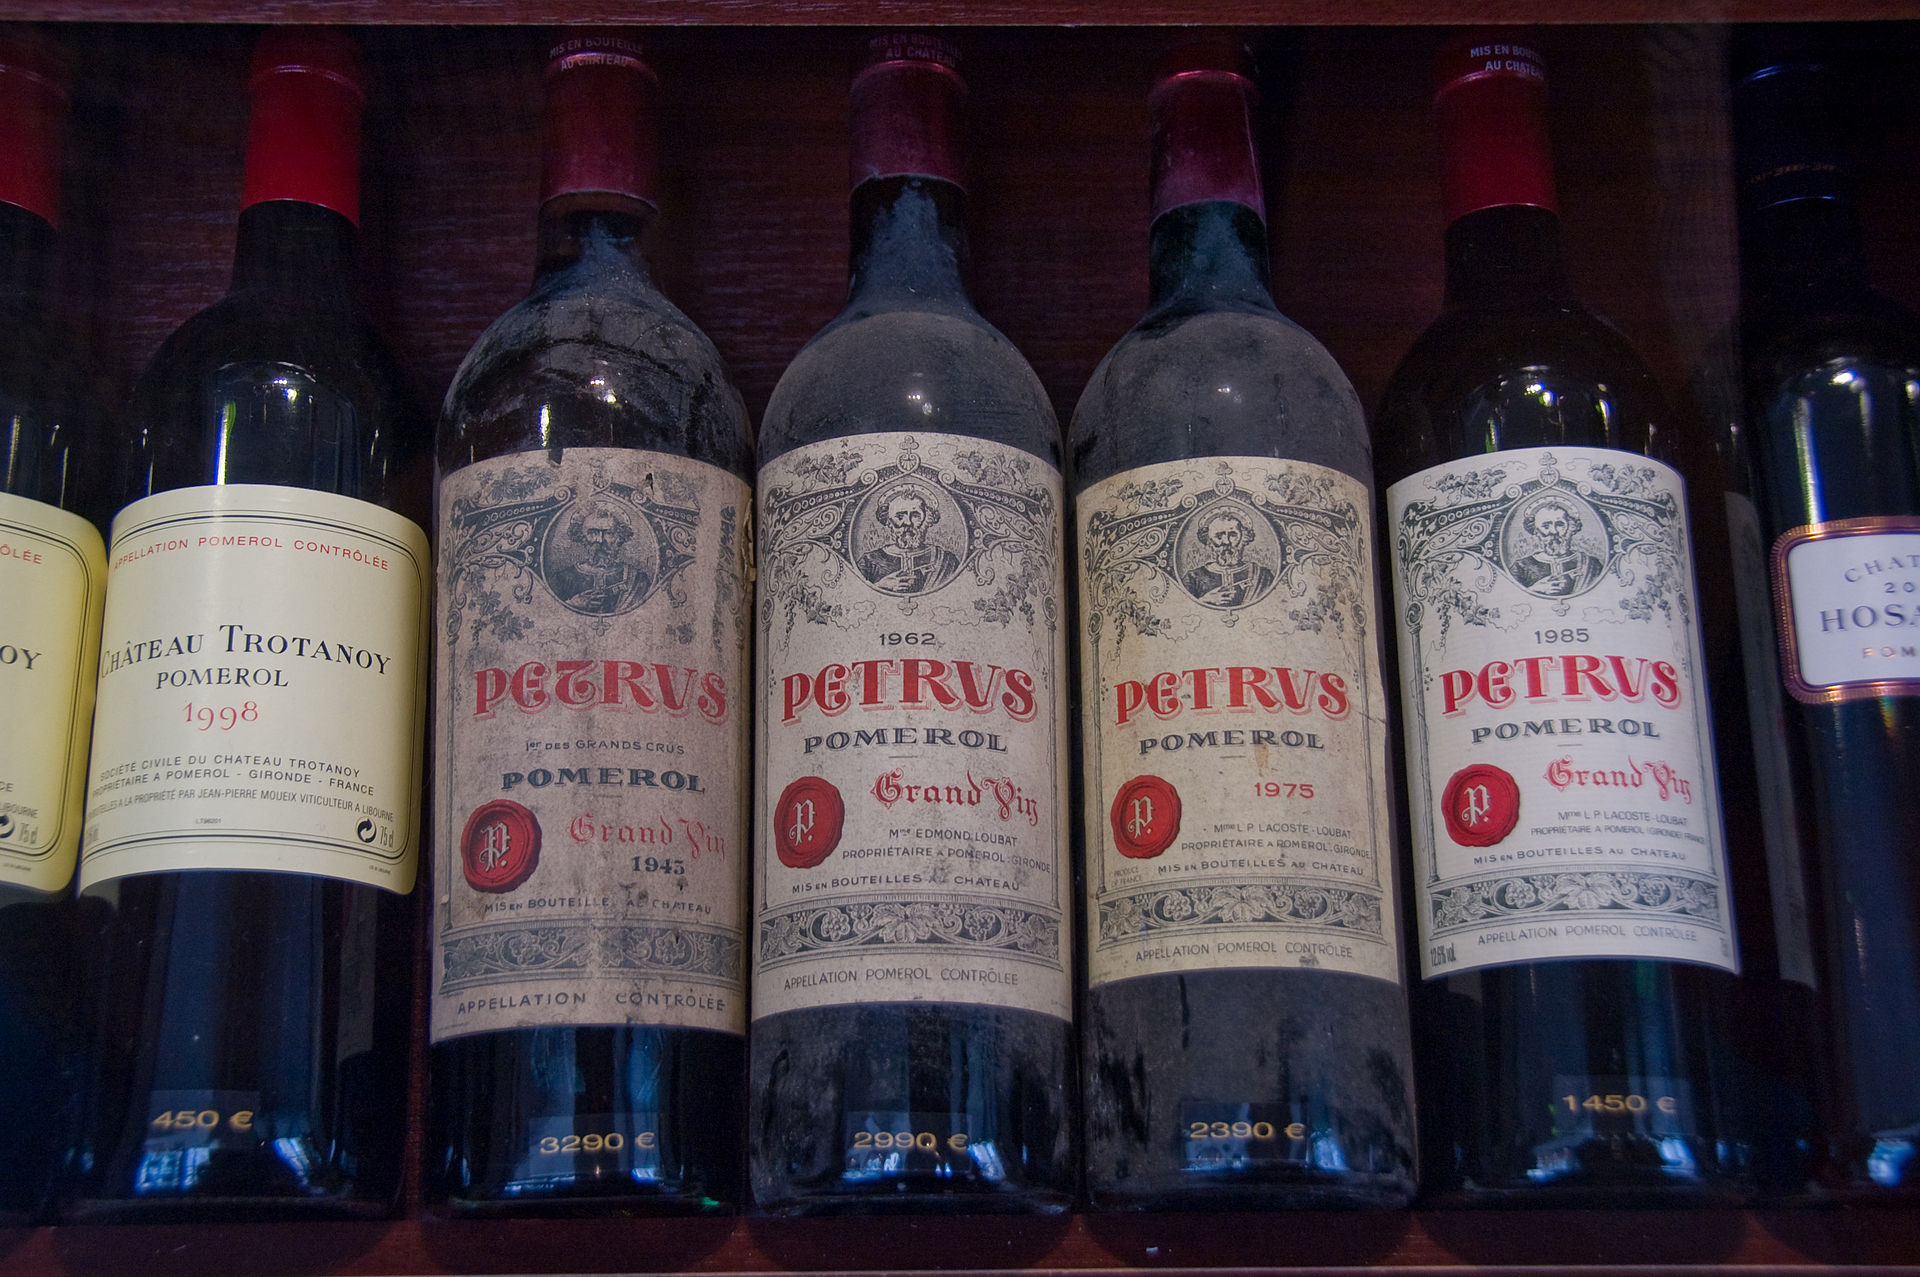

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**Our overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

---
---


**import the libraries and load the dataset.**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("wine_fraud.csv")
df.shape

(6497, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


**What are the unique variables in the target column we are trying to predict (quality)?**

In [6]:
df.quality.value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

**Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

<Axes: xlabel='quality', ylabel='count'>

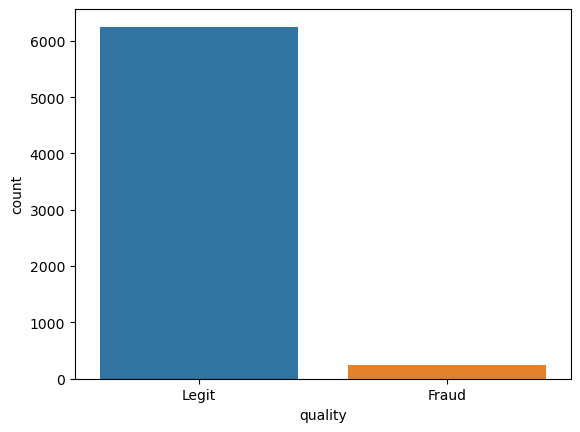

In [7]:
sns.countplot(x=df['quality'], hue=df['quality'])

**Let's find out if there is a difference between red and white wine when it comes to fraud. Below is a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

<Axes: xlabel='type', ylabel='count'>

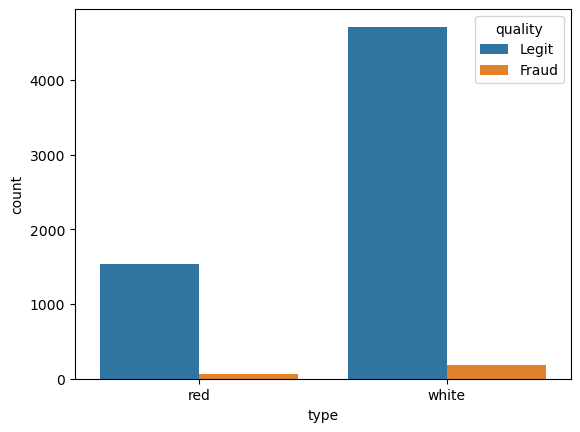

In [405]:
sns.countplot(x=df['type'], hue=df['quality'])

**What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [8]:
for type in df.type.unique().tolist():
    print(f'Percentage of fraud in {type} Wines:')
    print(len(df[(df['type']==type) & (df['quality']=='Fraud')])*100/len(df[(df['type']==type)]))

Percentage of fraud in red Wines:
3.9399624765478425
Percentage of fraud in white Wines:
3.736218864842793


**Calculate the correlation between the various features and the "quality" column. Here we map the column to 0 and 1 instead of a string.**

In [11]:
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud': 1})
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
4969,6.0,0.29,0.25,1.4,0.033,30.0,114.0,0.98794,3.08,0.43,13.2,Legit,white,0
4357,5.8,0.13,0.26,5.1,0.039,19.0,103.0,0.99478,3.36,0.47,9.3,Legit,white,0
2248,7.1,0.26,0.34,14.4,0.067,35.0,189.0,0.99860,3.07,0.53,9.1,Legit,white,0
1024,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,Legit,red,0
2607,6.6,0.22,0.37,1.2,0.059,45.0,199.0,0.99300,3.37,0.55,10.3,Legit,white,0
1558,6.9,0.63,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,Legit,red,0
4897,6.3,0.24,0.35,2.3,0.039,43.0,109.0,0.99056,3.34,0.44,11.8,Legit,white,0
5600,6.4,0.25,0.57,1.0,0.062,21.0,122.0,0.99238,3.00,0.40,9.5,Legit,white,0
2463,4.8,0.33,0.00,6.5,0.028,34.0,163.0,0.99370,3.35,0.61,9.9,Legit,white,0
4818,6.2,0.35,0.31,2.6,0.036,37.0,92.0,0.98938,3.27,0.53,12.8,Legit,white,0


In [12]:
df.corr(numeric_only=True)['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**Create a bar plot of the correlation values to Fraudlent wine.**

<Axes: >

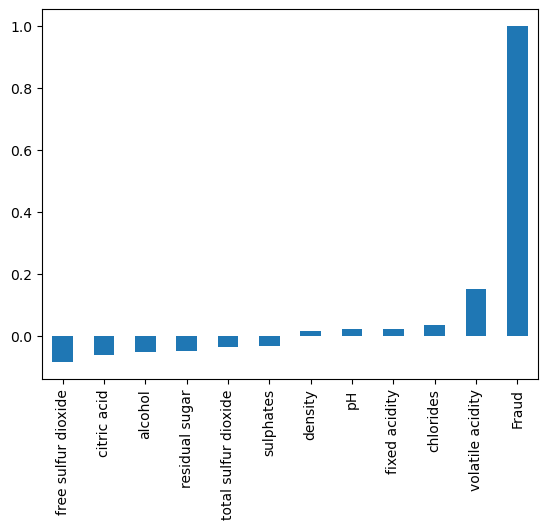

In [13]:
df.corr(numeric_only=True)['Fraud'].sort_values().plot(kind='bar')

**Create a clustermap with seaborn to explore the relationships between variables.**

<Figure size 1000x500 with 0 Axes>

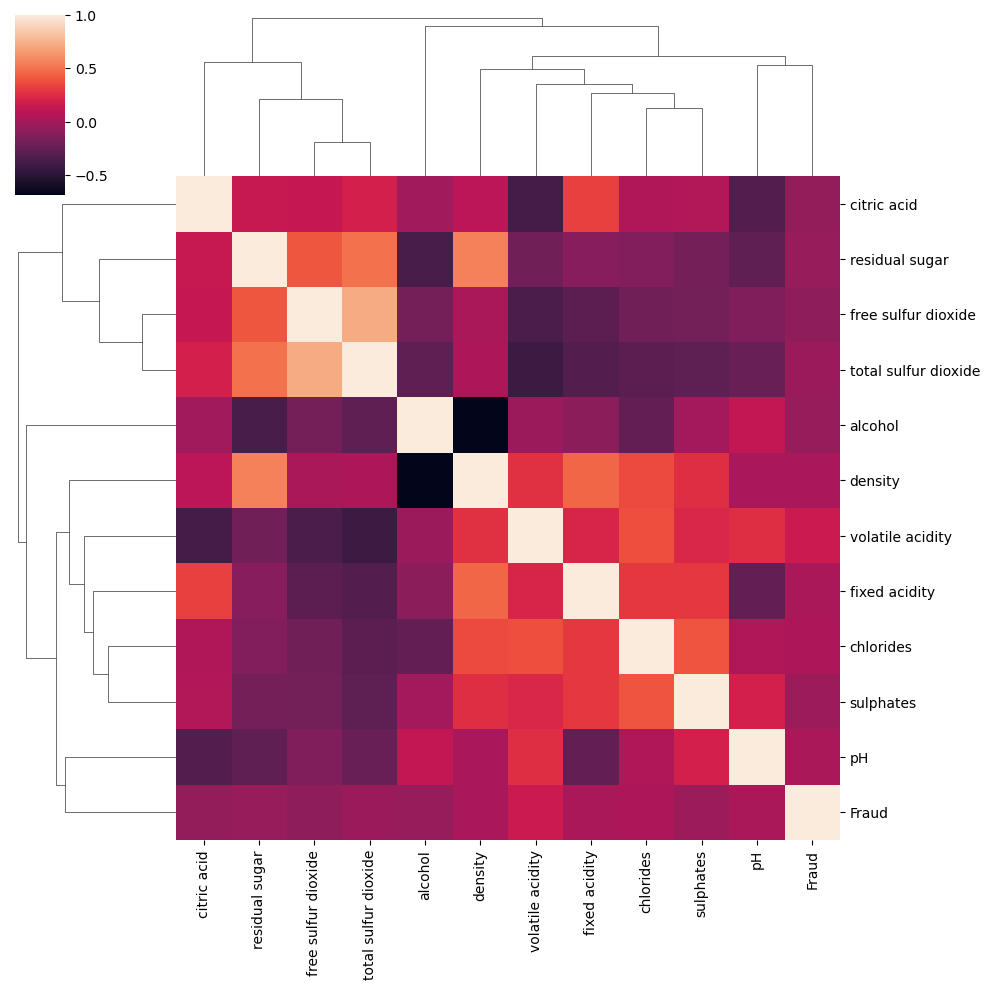

In [14]:
fig = plt.figure(figsize=(10, 5)) 
sns.clustermap(df.corr(numeric_only=True))

----
## Machine Learning Model

**Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
 13  Fraud                 6497 non-null   int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [16]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
enc = OneHotEncoder(drop='first', sparse_output=False, dtype='int64')

# Fit and transform the 'type' column of the DataFrame to one-hot encoded format
encoded_type = enc.fit_transform(df['type'].values.reshape(-1,1))
# Replace the original 'type' column with the one-hot encoded DataFrame with appropriate column names
df['type'] = pd.DataFrame(encoded_type, columns=enc.get_feature_names_out(['type']))

In [17]:
df.drop(columns=['Fraud'], axis=1, inplace=True)

**Separate out the data into X features and y target label ("quality" column)**

In [18]:
X = df.drop(columns='quality')
y = df['quality']

In [19]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


**Perform a Train|Test split on the data, with a 10% test size. Note: here random state of 101**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5847, 12)
(650, 12)
(5847,)
(650,)


In [22]:
y_train

1395    Legit
4393    Legit
1575    Legit
603     Legit
1146    Legit
        ...  
599     Legit
5695    Legit
1361    Legit
1547    Legit
4959    Legit
Name: quality, Length: 5847, dtype: object

**Scale the X train and X test data.**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_test_scaled[0]

array([-0.31042998,  1.35022785, -0.67668168, -0.7630049 ,  0.51737025,
       -0.87226347, -1.62094393, -0.09930376,  1.11764394,  1.92739138,
        0.5877305 , -1.75668833])

In [25]:
y_train.value_counts()

quality
Legit    5628
Fraud     219
Name: count, dtype: int64

**Here creating  an instance of a Support Vector Machine classifier. However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)**

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
clf = SVC()

**Use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [29]:
param_grid = {
    'C':[0.001,0.01,0.1,0.5,1],
    'gamma':['scale','auto'],
    'class_weight' : ['balanced']

}
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=4)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LibSVM]

GridSearchCV(cv=5, estimator=SVC(verbose=4), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'class_weight': ['balanced'],
                         'gamma': ['scale', 'auto']},
             verbose=4)

In [31]:
grid.best_params_

{'C': 1, 'class_weight': 'balanced', 'gamma': 'auto'}

In [32]:
y_pred = grid.predict(X_test_scaled)

In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8430769230769231

**Display the confusion matrix and classification report for your model.**

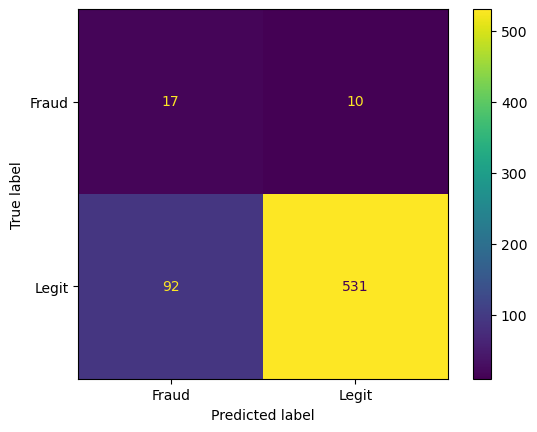

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid.classes_)
disp.plot()

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



**Finally, think about how well this model performed, would you suggest using it? Realistically will this work?**